In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

import os
import numpy as np

gpus = tf.config.experimental.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)



1 Physical GPUs, 1 Logical GPUs


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


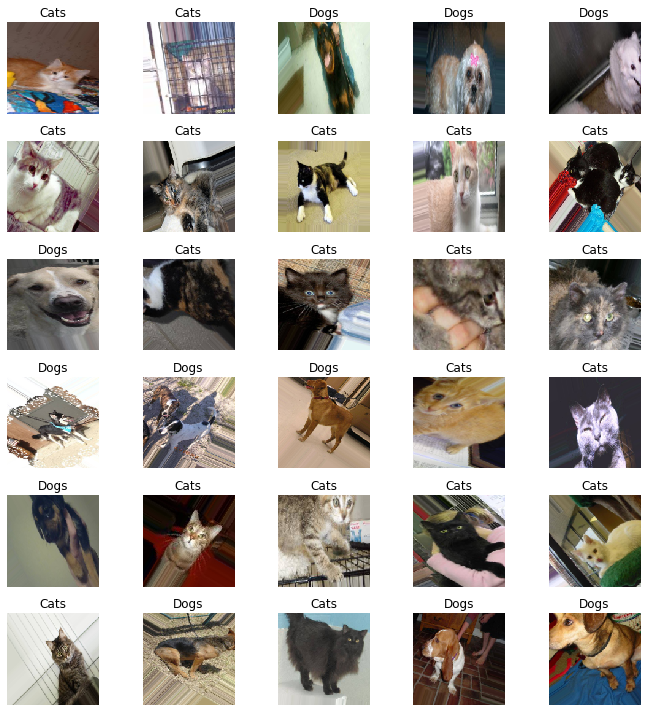

In [6]:
# 1) URL to prepared directory 

URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
data_root = tf.keras.utils.get_file('cats_and_dogs.zip', URL, extract=True)
data_root = os.path.join(os.path.dirname(data_root), 'cats_and_dogs_filtered')

train_dir = os.path.join(data_root, 'train')
validation_dir = os.path.join(data_root, 'validation')

############################################################

# 2) Directory to image iterator

batch_size = 128
IMG_SIZE = (150, 150)

train_image_generator = keras.preprocessing.image.ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    ) 

validation_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)


train_data = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=IMG_SIZE,
                                                           class_mode='binary')

val_data = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=IMG_SIZE,
                                                              class_mode='binary')

############################################################

# 3) Image iterator to image display

class_names = sorted(train_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])

def plotImages(sample_data):
    img, label = sample_data
    plt.figure(figsize=(10,10))
    plt.subplots_adjust(hspace=0.5)
    for n in range(30):
        plt.subplot(6,5,n+1)
        plt.imshow(img[n])
        plt.title(class_names[int(label[n])])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

sample_train_batch = next(iter(train_data))
plotImages(sample_train_batch)


In [11]:
OUTPUT_CHANNELS = 3
IMG_SHAPE = (*IMG_SIZE, OUTPUT_CHANNELS)

model = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=IMG_SHAPE),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0

In [10]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)


Epoch 1/25
15/15 [==============================] - 11s 751ms/step - loss: 1.1844 - accuracy: 0.4797 - val_loss: 0.6919 - val_accuracy: 0.5156
Epoch 2/25
15/15 [==============================] - 11s 713ms/step - loss: 0.6916 - accuracy: 0.5367 - val_loss: 0.6910 - val_accuracy: 0.5301
Epoch 3/25
15/15 [==============================] - 10s 638ms/step - loss: 0.6904 - accuracy: 0.5374 - val_loss: 0.6861 - val_accuracy: 0.5391
Epoch 4/25
15/15 [==============================] - 9s 619ms/step - loss: 0.6891 - accuracy: 0.5470 - val_loss: 0.6856 - val_accuracy: 0.5759
Epoch 5/25
15/15 [==============================] - 10s 640ms/step - loss: 0.6870 - accuracy: 0.5604 - val_loss: 0.6780 - val_accuracy: 0.6105
Epoch 6/25
15/15 [==============================] - 10s 645ms/step - loss: 0.6763 - accuracy: 0.5849 - val_loss: 0.6599 - val_accuracy: 0.6205
Epoch 7/25
15/15 [==============================] - 10s 641ms/step - loss: 0.6768 - accuracy: 0.5721 - val_loss: 0.6753 - val_accuracy: 0.5926


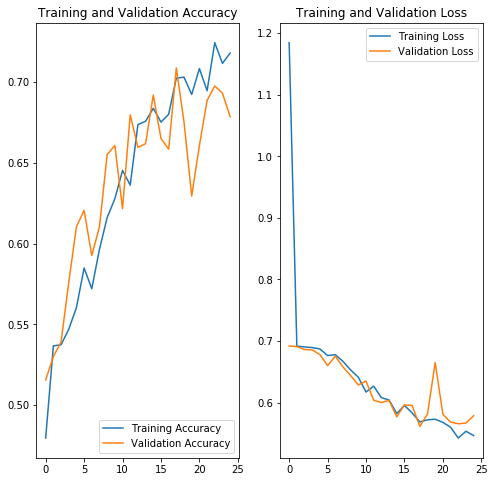

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()
